# **Polynomial Regression**

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
x = data.iloc[:,:-1]
y = data.iloc[:,1]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=10)


In [4]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 15)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)

poly_model = LinearRegression()
poly_model.fit(x_poly_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [5]:
y_poly_pred_train = poly_model.predict(x_poly_train)

y_poly_pred_test = poly_model.predict(x_poly_test)

In [6]:
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1,1)

x_range_poly = poly.transform(x_range)

y_range_pred = poly_model.predict(x_range_poly)

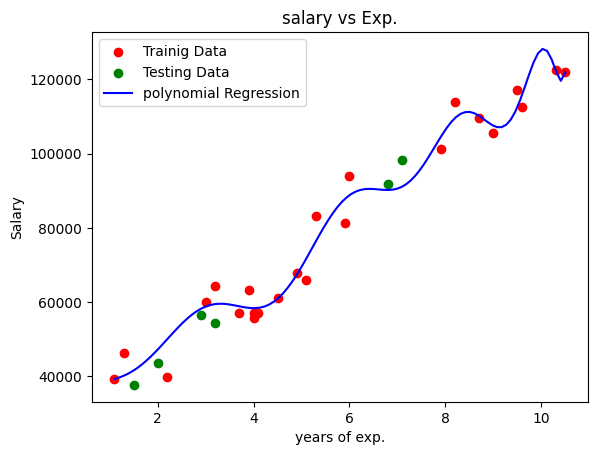

In [7]:
plt.scatter(x_train, y_train, color= 'red', label = 'Trainig Data')
plt.scatter(x_test, y_test, color="green", label='Testing Data')

plt.plot(x_range, y_range_pred, color = 'blue', label = 'polynomial Regression')
plt.title("salary vs Exp.")
plt.xlabel('years of exp.')
plt.ylabel('Salary')

plt.legend()
plt.show()

In [8]:
mse = mean_squared_error(y_test, y_poly_pred_test)
mse

18440687.512780067

In [9]:
rmse =root_mean_squared_error(y_test, y_poly_pred_test)
rmse

4294.262161626845

In [10]:
r2 = r2_score(y_test, y_poly_pred_test)
r2

0.9654054168150664

# **Logistic Regression**

In [17]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [18]:
x = df.iloc[:,[2,3]].values
y = df.iloc[:,4].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [19]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [20]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

In [24]:
from sklearn.metrics import  confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, roc_auc_score

cm= confusion_matrix(y_test, y_pred)
cm

array([[48,  4],
       [ 5, 23]])

In [25]:
tn, fp, fn, tp = cm.ravel()

In [26]:
print(tn)

48


In [27]:
accuracy_score_ =accuracy_score(y_test, y_pred)
recall_score_=recall_score(y_test, y_pred)
precision_score_=precision_score(y_test, y_pred)
f1_score_=f1_score(y_test, y_pred)
print('accuracy_score_',accuracy_score_)
print('recall_score_',recall_score_)
print('precision_score_',precision_score_)
print('f1_score_',f1_score_)


accuracy_score_ 0.8875
recall_score_ 0.8214285714285714
precision_score_ 0.8518518518518519
f1_score_ 0.8363636363636363


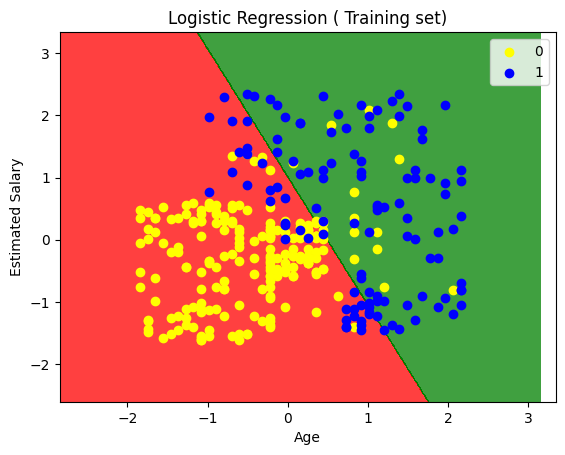

In [28]:
from matplotlib.colors import ListedColormap
X_Set, Y_Set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:,0].min() -1, stop = X_Set[:, 0].max() +1, step = 0.01),
        np.arange(start = X_Set[:,1].min() -1, stop = X_Set[:, 1].max() +1, step = 0.01))

plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X2.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j,1],
                c = ListedColormap(('yellow', 'blue'))(i), label = j)
plt.title('Logistic Regression ( Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()